In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data preprocessing

In [2]:
train_set = pd.read_csv('/Users/xavierpivan/Projets/AI/Kaggle/Titanic/Data/titanic/train.csv')
test_set = pd.read_csv('/Users/xavierpivan/Projets/AI/Kaggle/Titanic/Data/titanic/test.csv')
gender_submission = pd.read_csv('/Users/xavierpivan/Projets/AI/Kaggle/Titanic/Data/titanic/gender_submission.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The Age and Cabin data are incomplete. We will further investigate if we the Age is an important parameter and let's check the Cabin column:

In [4]:
train_set['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

The non-numeric type of the Cabin and its sparsity and its several missing values make it irrelevant to use for a model. We won't use it at all in this study so let's drop it from the initial data:

In [5]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_set_corr = train_set.corr()
train_set_corr

/var/folders/s1/t3dxzy3s3fqccsfjkhggz3fr0000gn/T/ipykernel_3564/2630660702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set_corr = train_set.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
list(train_set)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Let's have an overview of the data

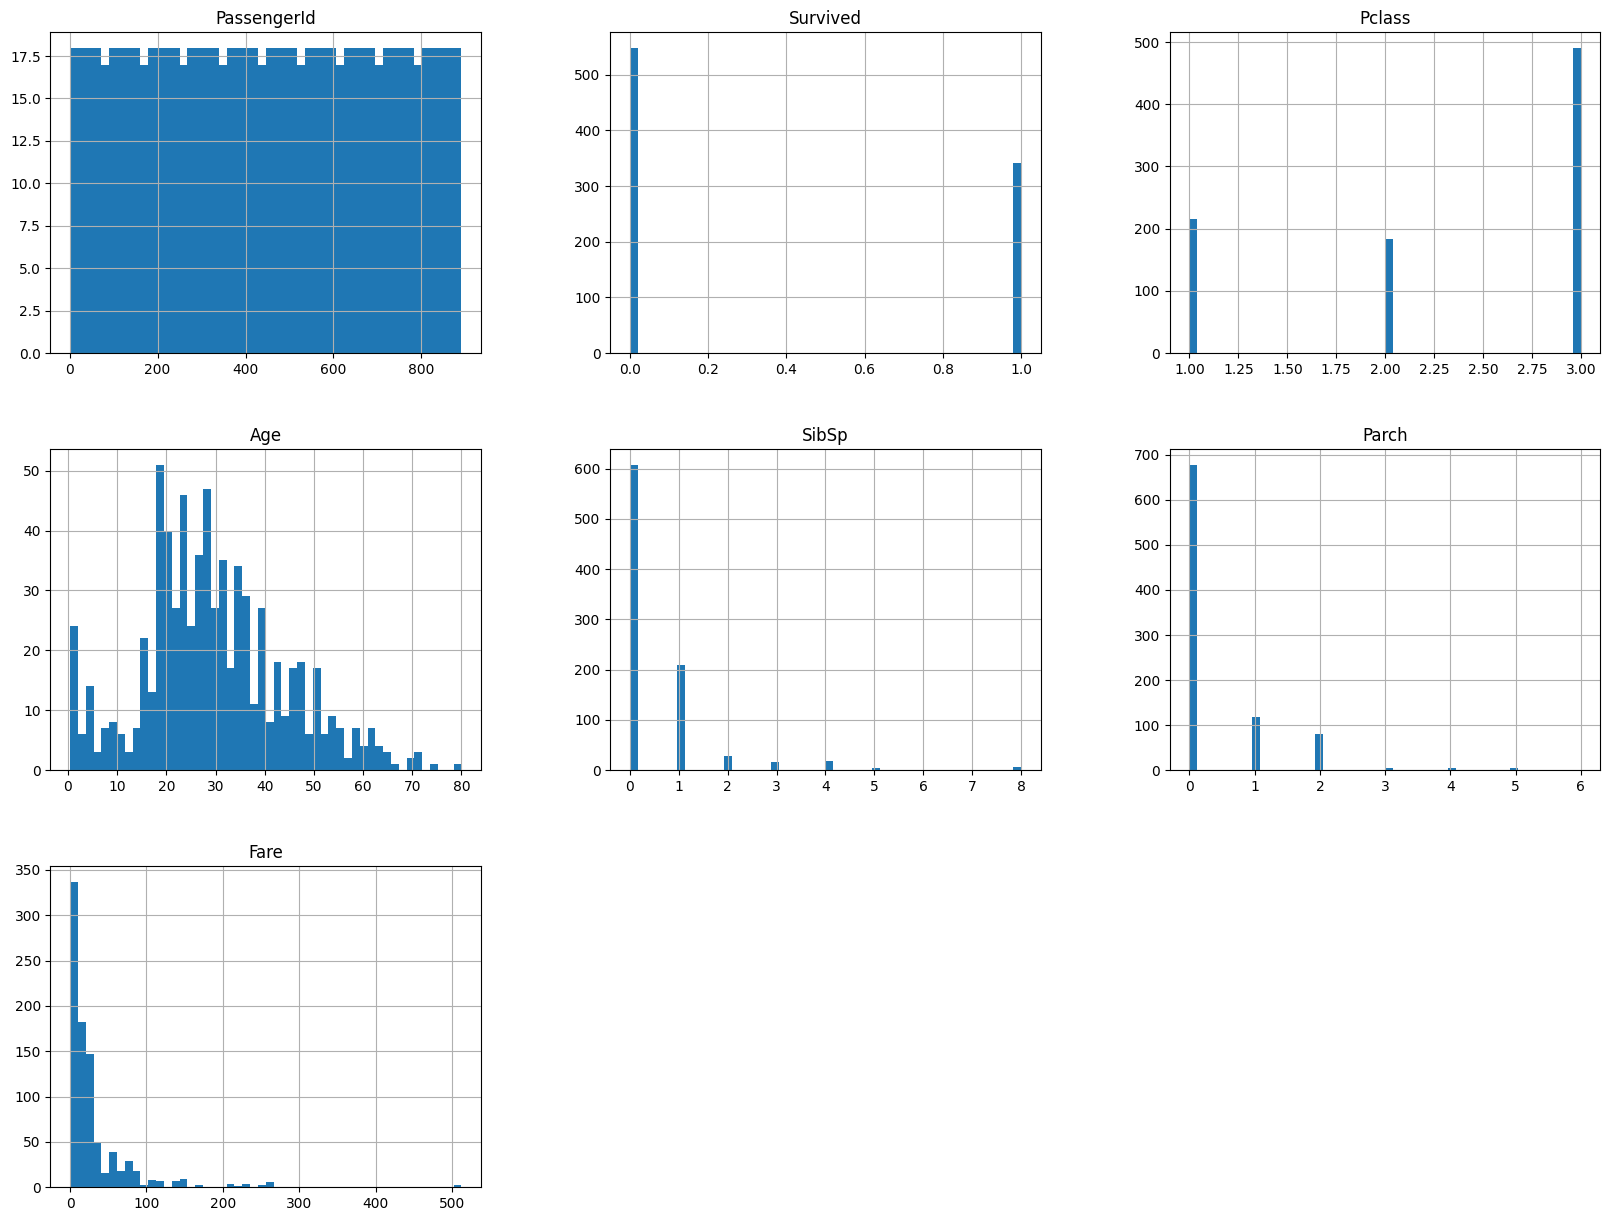

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
train_set.hist(bins=50, figsize=(20,15)) 
plt.show()


In [11]:
train_set['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

The name doesn't provide valuable insight in first regard. In order to make a simple in first instance, we gonna remove this data.
A name classification could be useful but could be similar to the passenger class

The model we wanna develop is supervised learning. The labels is a simple logistic regression [0,1]

In [12]:
passenger_labels = train_set['Survived']
train_set = train_set.drop('Survived', axis=1)

In [13]:
for i in list(train_set):
    print("Number of unique values for {} are {}".format(i, len(train_set[i].value_counts())))

Number of unique values for PassengerId are 891
Number of unique values for Pclass are 3
Number of unique values for Name are 891
Number of unique values for Sex are 2
Number of unique values for Age are 88
Number of unique values for SibSp are 7
Number of unique values for Parch are 7
Number of unique values for Ticket are 681
Number of unique values for Fare are 248
Number of unique values for Cabin are 147
Number of unique values for Embarked are 3


In [15]:
train_set['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## Preparing and Encoding the object value

We wanna encode the object in first instance. We don't want to take in account the name. The 3 objects are: ['Sex', 'Ticket', 'Embarked']

To be dropped:
Cabin, Ticket, PassengerId and Name column

Missing value:
Embarked: 2 missing values
Age: 177 missing values

Solutions:
Drop the 2 missing values for the Embarked
Age: Analyze if it worth to replace by the median value the missing value

OneHotEncoder applied to:
Sex, Ticket, Embarked, Pclass

Normalized:
PClass, Parch, Sibsp, Fare, Age

### Dropping useless data and impute median strategy to the age

In [55]:
#Dropping the Cabin and Name column
median = train_set['Age'].median()

def get_train_set_4_model(train_set):
    train_set_model = train_set.drop(['Cabin', 'Ticket', 'Name'], axis=1)
    PassengerId = train_set_model['PassengerId']
    train_set_model = train_set_model.drop('PassengerId', axis=1)
    train_set_model['Embarked'] = train_set_model['Embarked'].fillna(train_set_model['Embarked'].mode().values[0])
    return train_set_model, PassengerId

def get_set_labelled(train_set_model):
    passenger_labelled = train_set_model['Survived']
    train_set_model = train_set_model.drop('Survived', axis=1)
    return (train_set_model, passenger_labelled)

def filter_prediction(predictions):
    predictions[predictions>0.5]=1
    predictions[predictions<=0.5]=0
    return predictions

def evaluate_prediction(predictions, labels):
     return np.sum(predictions==labels)/len(labels)


In [17]:
train_set_model, _ = get_train_set_4_model(train_set)
#train_set_model, passenger_labelled = get_set_labelled(train_set_model)

KeyError: 'Survived'

In [18]:
train_set_model.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

### Encoding the object data

In [19]:
num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Sex', 'Embarked']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

passenger_prepared = full_pipeline.fit_transform(train_set_model)
passenger_prepared[0]

array([ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ])

### Linear regression

In [23]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(passenger_prepared, passenger_labels)

LinearRegression()

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()

In [51]:
from sklearn.model_selection import cross_val_predict

passenger_pred = cross_val_predict(forest_reg, passenger_prepared, passenger_labels,
                                   cv=10)
n_correct = np.sum(passenger_pred==passenger_labels)/len(passenger_labels)
n_correct

0.8159371492704826

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(passenger_pred, passenger_labels)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [71]:
passenger_predictions = lin_reg.predict(passenger_prepared)

In [72]:
passenger_predictions[passenger_predictions>0.5]=1
passenger_predictions[passenger_predictions<=0.5]=0

In [73]:
from sklearn.metrics import recall_score
recall_score(passenger_labelled, passenger_predictions)

0.6871345029239766

### Random forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()

In [193]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':np.arange(20,161,20).tolist(), 'max_features': [2, 4, 6, 8]}

grid_forest = GridSearchCV(forest_reg, parameters, scoring='accuracy',return_train_score=True)


In [194]:
grid_forest.fit(passenger_prepared, passenger_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160]},
             return_train_score=True, scoring='accuracy')

In [198]:
grid_forest.best_params_

{'max_features': 8, 'n_estimators': 20}

In [197]:
grid_forest.cv_results_

{'mean_fit_time': array([0.01705942, 0.02404623, 0.0351306 , 0.04758663, 0.0594449 ,
        0.07273383, 0.0821444 , 0.09534721, 0.01329865, 0.02630973,
        0.03963275, 0.05268445, 0.06798916, 0.08088479, 0.09389181,
        0.10934   , 0.01487985, 0.02913947, 0.04423537, 0.05856481,
        0.07360816, 0.08821778, 0.10269461, 0.119979  , 0.01677027,
        0.03318377, 0.05008211, 0.06665549, 0.08219414, 0.09831095,
        0.11349988, 0.13272786]),
 'std_fit_time': array([0.00637162, 0.00059579, 0.00038   , 0.00126329, 0.00127647,
        0.00357021, 0.00195015, 0.00299131, 0.00013457, 0.00014918,
        0.00034147, 0.00091429, 0.00163826, 0.00194608, 0.00173554,
        0.00205588, 0.0001951 , 0.00038976, 0.00081049, 0.00124715,
        0.00086771, 0.00144232, 0.00148269, 0.00255341, 0.00027498,
        0.00103879, 0.00052747, 0.00301643, 0.00127212, 0.00225285,
        0.00310267, 0.00253827]),
 'mean_score_time': array([0.00106163, 0.0015471 , 0.00215974, 0.0028306 , 0.003678

In [196]:
predict_svc = grid_forest.predict(passenger_prepared)
accuracy = evaluate_prediction(predict_svc,passenger_labels)
accuracy

0.9730639730639731

### SVM

In [73]:
from sklearn.svm import SVC

svc = SVC()
passenger_pred_svc = cross_val_predict(svc, passenger_prepared, passenger_labels, cv=3)
evaluate_prediction(passenger_pred_svc, passenger_labels)

0.8271604938271605

In [98]:
type(np.arange(10).tolist())
np.arange(10).tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [189]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':np.arange(1,11).tolist(),
             'degree':np.arange(2,5).tolist()}

grid = GridSearchCV(svc, parameters)


In [190]:
grid.fit(passenger_prepared, passenger_labels)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'degree': [2, 3, 4],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [191]:
grid.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf'}

In [192]:
predict_svc = grid.predict(passenger_prepared)
accuracy = evaluate_prediction(predict_svc,passenger_labels)
accuracy

0.8451178451178452

## Test set predictions

In [199]:
test_set_model, PassengerId = get_train_set_4_model(test_set)
test_set_model.iloc[0]

Pclass           3
Sex           male
Age           34.5
SibSp            0
Parch            0
Fare        7.8292
Embarked         Q
Name: 0, dtype: object

In [200]:
test_prepared = full_pipeline.fit_transform(test_set_model)
test_prepared[0]

array([ 0.87348191,  0.38623105, -0.49947002, -0.4002477 , -0.49741333,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ])

In [201]:
final_predictions = grid_forest.predict(test_prepared)
final_predictions[final_predictions>0.5]=int(1)
final_predictions[final_predictions<=0.5]=int(0)


In [173]:
final_predictions = grid.predict(test_prepared)
final_predictions = filter_prediction(final_predictions)

In [202]:
predictions_csv = {
    'PassengerId':PassengerId.values,
    'Survived':final_predictions}


In [203]:
df = pd.DataFrame.from_dict(predictions_csv)
df['Survived'] = df['Survived'].astype(int)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [204]:
df.to_csv('/Users/xavierpivan/Projets/AI/Kaggle/Titanic/Submission/submission.csv', index=False)

In [154]:
test_set_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
test_set.info()